Kaplan-Meier by Tx Modality:


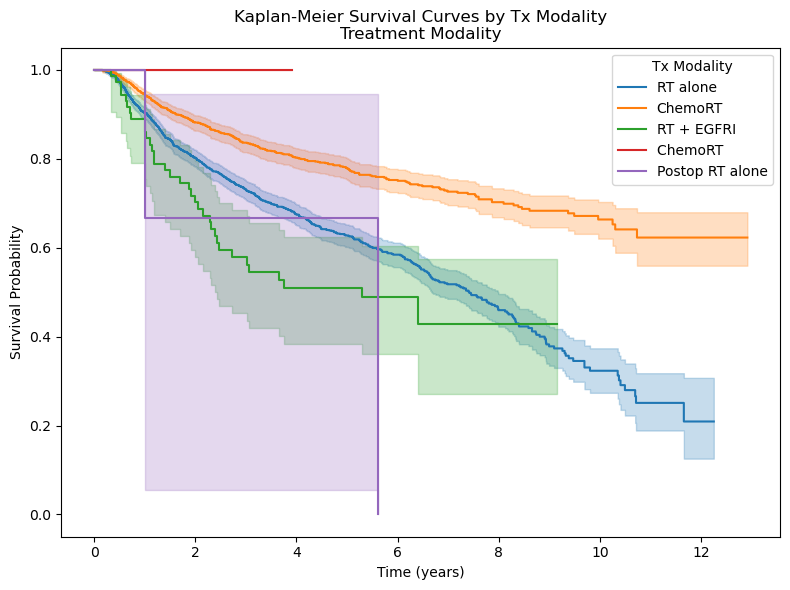

Log-rank test between RT alone and ChemoRT: p-value = 0.0000
Kaplan-Meier by Stage:


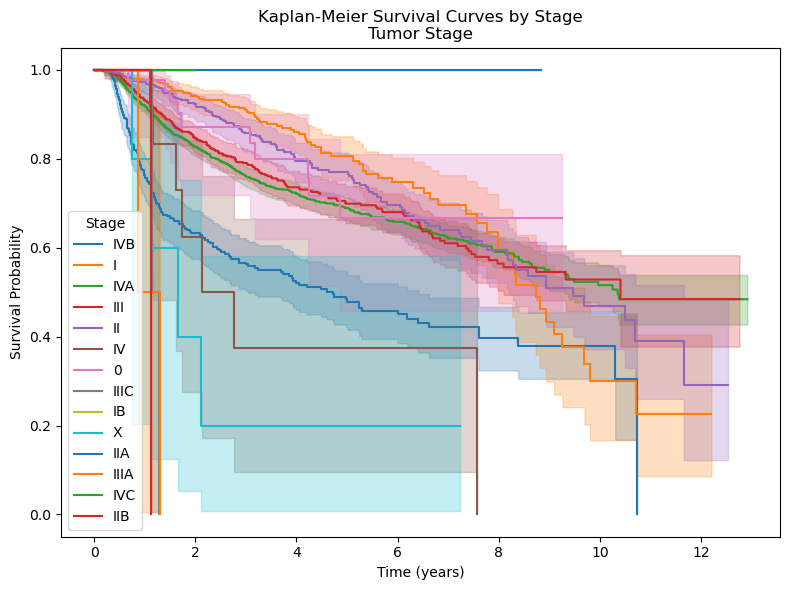

Log-rank test between IVB and I: p-value = 0.0000

Cox Proportional Hazards Regression Summary (stratified by Stage):


<lifelines.CoxPHFitter: fitted with 3319 total observations, 2269 right-censored observations>
             duration col = 'time'
                event col = 'event'
                   strata = Stage
      baseline estimation = breslow
   number of observations = 3319
number of events observed = 1050
   partial log-likelihood = -6094.54
         time fit was run = 2025-07-14 18:29:00 UTC

---
                              coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                                     
Age                           0.04      1.04      0.00            0.03            0.04                1.03                1.04
Tx Modality_ChemoRT         -11.60      0.00    731.94        -1446.17         1422.97                0.00                 inf
Tx Modality_Postop RT alone   1.91      6.77      0.71            0.51            3.31                1.67               27.44
Tx Modality_RT + EGFRI        0.51      1.66      0.18            0.15            0.86                1.16                2.37
Tx Modality_RT alone          0.72      2.06      0.08            0.57            0.88                1.76                2.42

                             cmp to     z      p  -log2(p)
covariate                                                 
Age                            0.00 11.26 <0.005     95.29
Tx Modality_ChemoRT            0.00 -0.02   0.99      0.02
Tx Modality_Postop RT alone    0.00  2.68   0.01      7.09
Tx Modality_RT + EGFRI         0.00  2.75   0.01      7.41
Tx Modality_RT alone           0.00  8.96 <0.005     61.41
---
Concordance = 0.67
Partial AIC = 12199.08
log-likelihood ratio test = 371.26 on 5 df
-log2(p) of ll-ratio test = 256.91


Proportional Hazards Assumption Test (links suppressed):


<lifelines.StatisticalResult: proportional_hazard_test>
 null_distribution = chi squared
degrees_of_freedom = 1
             model = <lifelines.CoxPHFitter: fitted with 3319 total observations, 2269 right-censored observations>
         test_name = proportional_hazard_test

---
                                  test_statistic      p  -log2(p)
Age                         km             10.70 <0.005      9.87
                            rank           12.97 <0.005     11.62
Tx Modality_ChemoRT         km              0.00   1.00      0.00
                            rank            0.00   1.00      0.00
Tx Modality_Postop RT alone km              0.56   0.45      1.14
                            rank            0.31   0.57      0.80
Tx Modality_RT + EGFRI      km              0.83   0.36      1.47
                            rank            2.78   0.10      3.38
Tx Modality_RT alone        km              0.18   0.67      0.58
                            rank            0.02   0.88      0.18

The ``p_value_threshold`` is set at 0.05. Even under the null hypothesis of no violations, some
covariates will be below the threshold by chance. This is compounded when there are many covariates.
Similarly, when there are lots of observations, even minor deviances from the proportional hazard
assumption will be flagged.

With that in mind, it's best to use a combination of statistical tests and visual tests to determine
the most serious violations. Produce visual plots using ``check_assumptions(..., show_plots=True)``



1. Variable 'Age' failed the non-proportional test: p-value is 0.0003.

   Advice 1: the functional form of the variable 'Age' might be incorrect. That is, there may be
non-linear terms missing. The proportional hazard test used is very sensitive to incorrect

   Advice 2: try binning the variable 'Age' using pd.cut, and then specify it in `strata=['Age',

below.


---



<lifelines.CoxPHFitter: fitted with 3319 total observations, 2269 right-censored observations>
             duration col = 'time'
                event col = 'event'
                   strata = Stage
      baseline estimation = breslow
   number of observations = 3319
number of events observed = 1050
   partial log-likelihood = -6094.54
         time fit was run = 2025-07-14 18:29:00 UTC
                     file = <_io.TextIOWrapper name='plots/cox_summary.txt' mode='w' encoding='cp1252'>

---
                              coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                                     
Age                           0.04      1.04      0.00            0.03            0.04                1.03                1.04
Tx Modality_ChemoRT         -11.60      0.00    731.94        -1446.17         1422.97                0.00                 inf
Tx Modality_Postop RT alone   1.91      6.77      0.71            0.51            3.31                1.67               27.44
Tx Modality_RT + EGFRI        0.51      1.66      0.18            0.15            0.86                1.16                2.37
Tx Modality_RT alone          0.72      2.06      0.08            0.57            0.88                1.76                2.42

                             cmp to     z      p  -log2(p)
covariate                                                 
Age                            0.00 11.26 <0.005     95.29
Tx Modality_ChemoRT            0.00 -0.02   0.99      0.02
Tx Modality_Postop RT alone    0.00  2.68   0.01      7.09
Tx Modality_RT + EGFRI         0.00  2.75   0.01      7.41
Tx Modality_RT alone           0.00  8.96 <0.005     61.41
---
Concordance = 0.67
Partial AIC = 12199.08
log-likelihood ratio test = 371.26 on 5 df
-log2(p) of ll-ratio test = 256.91


Random Survival Forest Permutation Importance:
       feature  importance
2        Stage    0.102056
0          Age    0.057436
1  Tx Modality    0.034747

Random Survival Forest C-index: 0.6932
Cox Regression C-index: 0.6231


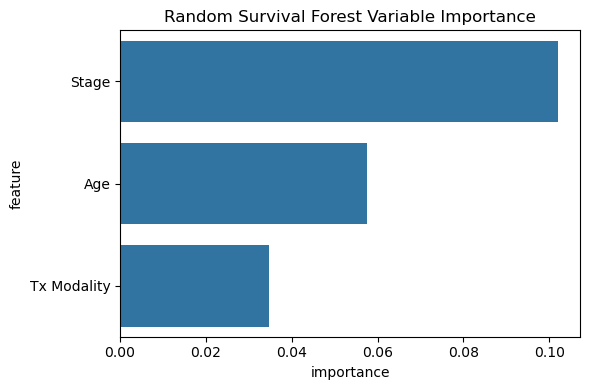


All graphs have been saved in the 'plots' folder.
All statistics and tables have been printed above and saved as files where appropriate.


In [12]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io
import sys

from lifelines import KaplanMeierFitter, CoxPHFitter
from lifelines.statistics import logrank_test
from lifelines.utils import concordance_index

from sksurv.ensemble import RandomSurvivalForest
from sksurv.util import Surv
from sklearn.model_selection import train_test_split

# Create a directory to save plots
os.makedirs("plots", exist_ok=True)

# Load and clean data
file_path = "C:/Users/sindh/PycharmProjects/Anjali-Sindha-Machine-Learning-AI-Bioinforma---BINF-5507-0TA/Assignment 4/Data/RADCURE_Clinical_v04_20241219.csv"
df = pd.read_csv(file_path)
df.columns = df.columns.str.strip()

# Prepare survival time and event indicator
df["event"] = df["Status"].str.strip().map({"Dead": 1, "Alive": 0})
df["time"] = pd.to_numeric(df["Length FU"], errors="coerce")
df = df.dropna(subset=["time", "event"])

# Kaplan-Meier Analysis (plots for Tx Modality and Stage)
def plot_km(df, group_col, title, filename):
    kmf = KaplanMeierFitter()
    groups = df[group_col].dropna().unique()
    plt.figure(figsize=(8,6))
    for group in groups:
        mask = df[group_col] == group
        kmf.fit(df.loc[mask, "time"], df.loc[mask, "event"], label=str(group))
        kmf.plot(ci_show=True)
    plt.title(f"Kaplan-Meier Survival Curves by {group_col}\n{title}")
    plt.xlabel("Time (years)")
    plt.ylabel("Survival Probability")
    plt.legend(title=group_col)
    plt.tight_layout()
    plt.savefig(f"plots/{filename}.png")
    plt.show()
    # Log-rank test (pairwise for first two groups)
    if len(groups) >= 2:
        group1, group2 = groups[:2]
        ix1 = df[group_col] == group1
        ix2 = df[group_col] == group2
        results = logrank_test(df.loc[ix1, "time"], df.loc[ix2, "time"],
                              df.loc[ix1, "event"], df.loc[ix2, "event"])
        print(f"Log-rank test between {group1} and {group2}: p-value = {results.p_value:.4f}")

print("Kaplan-Meier by Tx Modality:")
plot_km(df, "Tx Modality", "Treatment Modality", "km_tx_modality")

print("Kaplan-Meier by Stage:")
plot_km(df, "Stage", "Tumor Stage", "km_stage")

# Cox Proportional Hazards Regression (stratified by Stage)
cox_df = df[["time", "event", "Age", "Tx Modality", "Stage"]].copy()
cox_df["Age"] = pd.to_numeric(cox_df["Age"], errors="coerce")
cox_df = cox_df.dropna()
cox_df = pd.get_dummies(cox_df, columns=["Tx Modality"], drop_first=True)

cph = CoxPHFitter()
cph.fit(cox_df, duration_col="time", event_col="event", strata=["Stage"])
print("\nCox Proportional Hazards Regression Summary (stratified by Stage):")
cph.print_summary()

# Proportional Hazards Assumption Test (suppressing links in output)
print("\nProportional Hazards Assumption Test (links suppressed):")
buffer = io.StringIO()
sys_stdout = sys.stdout
sys.stdout = buffer
cph.check_assumptions(cox_df, p_value_threshold=0.05, show_plots=False)
sys.stdout = sys_stdout
for line in buffer.getvalue().splitlines():
    if "http" not in line and "link" not in line and "Link" not in line:
        print(line)
with open("plots/cox_ph_assumption.txt", "w") as f:
    for line in buffer.getvalue().splitlines():
        if "http" not in line and "link" not in line and "Link" not in line:
            f.write(line + "\n")

# Save Cox summary as a text file
with open("plots/cox_summary.txt", "w") as f:
    cph.print_summary(file=f)

# Random Survival Forests (RSF) with custom variable importance
rsf_df = df[["time", "event", "Age", "Tx Modality", "Stage"]].copy()
rsf_df["Age"] = pd.to_numeric(rsf_df["Age"], errors="coerce")
rsf_df = rsf_df.dropna()
rsf_df["Tx Modality"] = rsf_df["Tx Modality"].astype("category").cat.codes
rsf_df["Stage"] = rsf_df["Stage"].astype("category").cat.codes

X = rsf_df[["Age", "Tx Modality", "Stage"]].values
y = Surv.from_arrays(event=rsf_df["event"].astype(bool), time=rsf_df["time"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rsf = RandomSurvivalForest(n_estimators=100, min_samples_split=10, min_samples_leaf=15,
                           max_features="sqrt", n_jobs=-1, random_state=42)
rsf.fit(X_train, y_train)

# Custom permutation importance for RSF
def rsf_cindex_scorer(estimator, X, y):
    return estimator.score(X, y)

from sklearn.inspection import permutation_importance
result = permutation_importance(
    rsf, X_test, y_test,
    n_repeats=10,
    random_state=42,
    scoring=rsf_cindex_scorer
)

features = ["Age", "Tx Modality", "Stage"]
imp_df = pd.DataFrame({
    "feature": features,
    "importance": result.importances_mean
}).sort_values("importance", ascending=False)

print("\nRandom Survival Forest Permutation Importance:")
print(imp_df)

# Save RSF variable importance as a CSV
imp_df.to_csv("plots/rsf_variable_importance.csv", index=False)

# C-index for RSF
rsf_cindex = rsf.score(X_test, y_test)
print(f"\nRandom Survival Forest C-index: {rsf_cindex:.4f}")

# C-index for Cox
cox_pred = cph.predict_partial_hazard(cox_df)
cox_cindex = concordance_index(cox_df["time"], -cox_pred, cox_df["event"])
print(f"Cox Regression C-index: {cox_cindex:.4f}")

# Plot variable importance
plt.figure(figsize=(6,4))
sns.barplot(x="importance", y="feature", data=imp_df)
plt.title("Random Survival Forest Variable Importance")
plt.tight_layout()
plt.savefig("plots/rsf_variable_importance.png")
plt.show()

# Save C-index comparison as a text file
with open("plots/cindex_comparison.txt", "w") as f:
    f.write(f"Random Survival Forest C-index: {rsf_cindex:.4f}\n")
    f.write(f"Cox Regression C-index: {cox_cindex:.4f}\n")

print("\nAll graphs have been saved in the 'plots' folder.")
print("All statistics and tables have been printed above and saved as files where appropriate.")
